 <h1><b><i>Sentiment Analysis on Restaurant Reviews</i></b></h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


TEXT 1: Provide a 1-2 paragraph **high level** overview of the purpose (what is going on AND why) of this Notebook, including the various steps as indicated by the following titles (some additional detail can be provided by subtitles within the notebook, but this description should remain 'high level'):
*   Exploratory Data Analysis
*   Model Training
*   Predictions
*   Overall Accuracy

NOTE: You may find this TEXT 1 easier to write AT THE END, after having completely run the Notebook and completed the rest of the assignment.

In this notebook we are conducting sentiment analysis on restaurant reviews. To do this, we first need to start the Exploratory Data Analysis phase. The EDA phase is the most important because we gain insights about our dataset. We check for things like imbalances, we visualize key statistics, stop words, we clean the data, and try to understand the data so that we can grasp the structure of the restaurant reviews.

Next is the model training where we find the best model that we can employ with classification to build a sentiment analysis model. We had to look through different models to find the best accuracy. We worked on utilizing different machine learning methods and transformer based neural networks. Here we made sure to define our hyper parameters and test the model’s accuracy at each stage with a confusion matrix on from the predictions of the model.

In the predictions we had to make sure that our model was not overfitting and that it was doing well against our testing dataset where it had to perform on unseen data. We had to make sure that in the classification report it met our accuracy thresholds for precision, recall, and f-1score. So that we had trust in the model to truly perform accurate sentiment analysis on the restaurant reviews.

Lastly, we had to measure the overall accuracy of the model. This consisted of testing the whole dataset on sentiment analysis. We want to see if the model was successful and could predict positive or negative reviews of the dataset. The model ended up having a high overall accuracy across the dataset, being able to make predictions on diverse text data.

#  Importing the libraries

# Library Loading

In [ ]:
# Importing essential Libraries

# NumPy is used for numerical computations and working with arrays.
import numpy as np

# Pandas is used for data manipulation and analysis.
import pandas as pd


# Exploratory Data Analysis (EDA)

<h2><b>Data Loading</b></h2>  Be sure you have uploaded the Restaurant_Reviews.csv data file to the Files area of Colab.

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Restaurant_Reviews.csv')

<h2><b>Descriptive Data Analysis</b></h2>

In [ ]:
df.shape

(1000, 2)

In [ ]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [ ]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
df.sample(5)

,Review,Liked
755,"When I'm on this side of town, this will defin...",1
601,"We got sitting fairly fast, but, ended up wait...",0
271,You cant go wrong with any of the food here.,1
641,I'm not eating here!,0
865,"They have a plethora of salads and sandwiches,...",1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [ ]:
df.duplicated().sum()

6

In [ ]:
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2,specs=[[{'type':'xy'}, {'type':'domain'}]])

fig.add_trace(
    go.Bar(
        x=df['Liked'].value_counts().index,
        y= df['Liked'].value_counts().values,
         marker=dict(color=['#6B816C','#91B092']), showlegend=False,
           text=df['Liked'].value_counts().values, textposition='auto', textfont=dict(size=18)
        ),
    row=1,col=1
    )

fig.add_trace(
    go.Pie(
        labels=df['Liked'].value_counts().index,
        values=df['Liked'].value_counts().values,
         marker=dict(colors=['#6B816C','#91B092']), textfont=dict(size=18),
         pull=[0.01,0.01]
        ),
    row=1,col=2
    )





fig.update_layout(title='<b>Distribution of the target<b>',
                 title_font={'size':25},
                 paper_bgcolor='#E0E1CD',
                 plot_bgcolor='#E0E1CD',
                 showlegend=True)

fig.update_yaxes(showgrid=False)
fig.show()

TEXT 2: In 2-3 sentences, based on the results of the Descriptive Data Analysis, provide a description of the dataset, filling in context that you can gather from the data itself, since you have not been given a data dictionary or description of the dataset.  Include 'technical' aspects of the dataset: how many rows, columns, datatypes, etc.  What does the 'Distribution of the target' visualization tell you about the 'balance' of the data?

**Answer: Based on the results, the data that was provided seems to be based off reviews left about the restaurant. There are 1000 rows and 2 columns, the columns are named review and liked. The reviewed data type is an object or our string values, while our liked is numerical ranging from 0 to 1. The distribution of the visualization tells me that the data is well balanced and at 500 for our 0 value and 500 for our 1 value, which mean we have a very balanced target variable with an even split.**

# **Feature Engineering**


In [ ]:
df['Length'] = df['Review'].apply(len)
df.head(5)

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


TEXT 3: What has been accomplished in the previous cell and why?

# **Data Preprocessing**


<h2><b>Importing essential NLP libraries</b></h2>

In [ ]:
# Comment 1: <Stop words are words that are used in a sentence but bring little to no value to the sentence and just fill the sentence.
#Removing stopwords from NLP help improve efficency ofthe NLP so that it is easier to classify text and make sntence relevant>

import nltk
import re

# Download NLTK stopwords data
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(list(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
'not' in stop_words

False

TEXT 3: In the previous cell, we searched for the word 'not' in stopwords and removed it, if it was in the list.  The final line of code, *'not' in stop_words*, returns as 'False', which is a confirmation that 'not' isn’t (or is no longer) in the list.    

Consider your response to Comment 1, what are stopwords and why are they used in NLP?  

Why might it be important to remove 'not' from the stopwords list?  HINT: have a look at the code and output in the next cell.

**Answer: In this case we want to keep not in our list and not delete it. It is important to the use case. Right now, we are coding this up to detect sentiment analysis in the text. So, in this case we want words like ‘not’, ‘good’, ‘bad’, etc. Because these words are going to be key indicators when our model is understanding the sentiment of the sentence, document, or text. If not was treated as a stop word, the negation in the sentiment may be lost during text analysis which would lead to wrong or incorrect interpretations.**

In [ ]:
print('Original :',df.Review.iloc[1])
print('processed with not removing negation :',' '.join([word for word in df.Review.iloc[1].split() if word not in stop_words]))

Original : Crust is not good.
processed with not removing negation : Crust not good.


In [ ]:
# Cleaning the Reviews and Creating a Corpus
# This cell is the perfect example of how several important ML tasks can be included in a single cell and run in 1.7 seconds with a single click.
# It's important to know what our code does in each cell, each line.

# Comment 2: <Here we need to clean the review column to remove any irrelevant information and sandardize our text ro prevent any noise in our data, so we can enhance efficiency of the NLP>
# Comment 3: <Below is the corpus variable that initializes an empty list. where we will store the review test after it has been cleaned>

corpus = []

# Loop through the first 1000 reviews (adjust the range as needed) in the DataFrame 'df'.
for i in range(0, 1000):

    # Comment 4: Step 1: Below we are going to use re.sub to to remove any special characters, punctioation, etc. So anything that is not a upper or lower case letter is removed.>
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i])

    # Comment 5: Step 2: The Line below calls the .lower() method which converts all the text to lower case in the review column>
    review = review.lower()

    # Comment 6: Step 3: Tokenization, Here we are going to call the split method where it puts the text into individual words and splits the string if there is whitespace to tokenize each word>
    review_words = review.split()

    # Comment 7: Step 4: Removing Stop Words, Below we are going to use the list comprehension to check our stopwords list to see if any of the words from the tokenization are there if not it puts it back in review_words>
    review_words = [word for word in review_words if word not in stop_words]

    # Comment 8: Step 5: Stemming,Below we create an instance of Porterstemmer to reduce word to their base form, instead of 'swimming' it will be 'swim' to simplify vocabulary, then save it back into review_words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    # Comment 9: Step 6: Rejoining Tokens, Below we use .join to concate the words in review because we are rejoining the stemmed words into a single string>
    review = ' '.join(review)

    # Comment 10: Step 7: Append to Corpus, Below we are using .append to which appends the string that review has into the empty list of corpus>
    corpus.append(review)

# Comment 11: After running this code, 'corpus' will contain <clean data text data for us to use in further analysis and implement in the model>


In [ ]:
corpus[:20]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like']

# Word Cloud

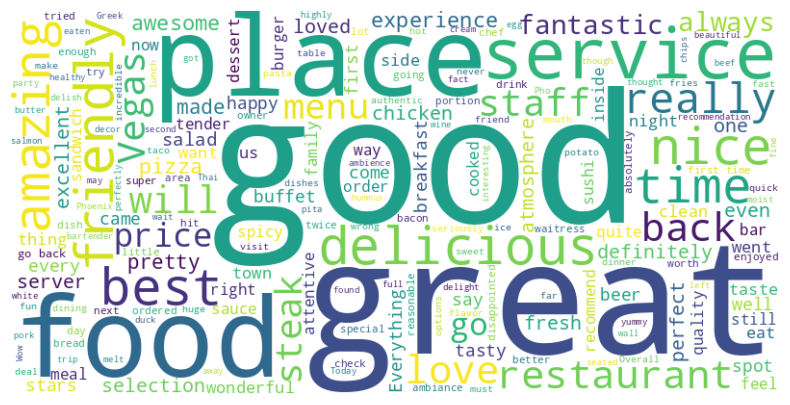

In [ ]:
# import library
# positive review

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked'] == 1,:]
text = ' '.join([text for text in word_cloud['Review']])
# Generate a WordCloud object
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

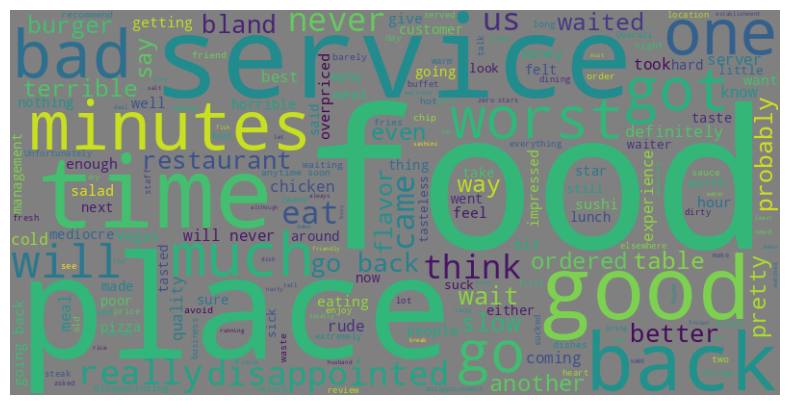

In [ ]:
#Code Modification 1: Copy and paste the code from the previous cell.
#Change two parameters to change the Word Cloud to depict negative reviews with a background in some color of your choice, other than white.
#Include the Code and a snip or cut and paste of your output in the Assignment Responses document.
#Modify comments to reflect the new image

from wordcloud import WordCloud
import matplotlib.pyplot as plt
#Finding all of the negative reviewa
word_cloud = df.loc[df['Liked'] == 0,:]
text = ' '.join([text for text in word_cloud['Review']])
# Generate a WordCloud object
wordcloud = WordCloud(width=800, height=400,background_color='grey').generate(text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Creating a Bag of Words Model
# For more detail on Bag of Words: https://builtin.com/machine-learning/bag-of-words

# Import the CountVectorizer class from scikit-learn, which is used to convert text data into numerical features.
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer with a specified maximum number of features (max_features).
# The 'max_features' parameter controls the number of most frequent words to keep in the vocabulary.
# Adjust this value based on your specific requirements.
cv = CountVectorizer(max_features=1500)

# Apply the CountVectorizer to the 'corpus' to transform the text data into a numerical representation.
# The 'fit_transform' method converts the text into a sparse matrix where rows represent reviews and columns represent words.
X = cv.fit_transform(corpus).toarray()

# 'X' now contains the BoW representation of the text data.

# Extract the target variable 'y' from the DataFrame 'df'.
# Assuming the target variable is located in the second column (index 1) of the DataFrame.
y = df.iloc[:, 1].values

# 'y' now contains the labels or target values corresponding to each review.

# The resulting 'X' and 'y' can be used to train machine learning models for tasks such as sentiment analysis or text classification.


<h2><b>Data Splitting</b></h2>

In [ ]:
# Splitting the Dataset into Training and Testing Sets

# Comment 12: In this code, we split the dataset into training and testing sets to < make sure that we can evaluate the performance of the model. The test set is on unseen data. The training set is on the labeled and predictive data.>

# Import the 'train_test_split' function from scikit-learn, which is used for splitting datasets.

########################################################################################

from sklearn.model_selection import train_test_split

# Split the feature matrix 'X' and the target variable 'y' into training and testing sets.
# The 'test_size' parameter specifies the proportion of the dataset to include in the test split.
# Here, 20% of the data is reserved for testing (test_size=0.20).
# The 'random_state' parameter ensures reproducibility by fixing the random seed for the split.
# This means that the same split will be obtained every time you run the code with the same random_state value.

############################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


###########################################################################

# 'X_train' and 'y_train' contain the features and labels for the training set, respectively.
# 'X_test' and 'y_test' contain the features and labels for the testing set, respectively.

# The dataset is typically divided into a training set (used to train the model) and a testing set (used to evaluate the model's performance).
# The proportions used in this split can be adjusted based on the specific requirements of your analysis.

# In this example, the dataset contains 1000 samples, and 80% (800 samples) are used for training,
# while 20% (200 samples) are used for testing. These proportions can be modified as needed.


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

# **Model Training**

TEXT 4: This notebook runs several algorithms on the dataset.  In layman's terms, explain the difference between machine learning for classification vs machine learning for prediction.  Can both approaches be applied to this problem?  Or is this problem more suited to one approach?

There are many differences between machine learning for prediction and classification. Machine learning for prediction is to estimate the correlation of a target variable that is numeric value and its given inputs or prediction set. The machine learning classification model tries to categorize the input data into classes. And is mostly used in unsupervised learning. For example, if you have a target variable based off yes and no and you need to see what category the data point will belong to, you will use classification. In this case I think since we are trying to classify what users liked or disliked based off the review, then we should use classification model because it is more suited for this type of task then a prediction model.


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,
)
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import (
    LogisticRegression, SGDClassifier, RidgeClassifier,
)
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import numpy as np

# Define a dictionary of models with their names as keys and model instances as values
models = {
    'MultinomialNB': MultinomialNB(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'SVC': SVC(),
    'LinearSVC': LinearSVC(),
    'NuSVC': NuSVC(),
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier(),
    'RidgeClassifier': RidgeClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),

}

# Create an empty dictionary to store model accuracies
# ... Your code up to the loop ...

# Create an empty dictionary to store model accuracies and their differences
model_accuracies = {}
model_accuracies_diff = {}

# Specify the number of folds (k)
num_folds = 11

# Initialize a KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through each model and train/evaluate it with k-fold cross-validation
for model_name, model in models.items():
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    # Calculate the average training and testing accuracy across all folds
    average_train_accuracy = np.mean(train_accuracies)
    average_test_accuracy = np.mean(test_accuracies)

    # Calculate the difference between training and testing accuracy
    accuracy_diff = abs(average_train_accuracy - average_test_accuracy)

    # Print training and testing accuracy for the model
    print(f"{model_name}: Training Accuracy={average_train_accuracy * 100:.2f}%, Testing Accuracy={average_test_accuracy * 100:.2f}%, Accuracy Difference={accuracy_diff * 100:.2f}%")
    print("="*149)

    # Store the average testing accuracy and the difference in accuracies in the model_accuracies and model_accuracies_diff dictionaries
    model_accuracies[model_name] = average_test_accuracy
    model_accuracies_diff[model_name] = accuracy_diff

# Sort the models based on the absolute difference between training and testing accuracy
sorted_models = sorted(model_accuracies_diff.items(), key=lambda x: x[1])
print()
# Print the best models in ascending order of accuracy difference
print("︻"*149)
print()
print("Best Models (Closest Training and Testing Accuracy):")
print()
print("︻"*149)
print()
for model_name, accuracy_diff in sorted_models:
    print(f"{model_name}: Accuracy Difference={accuracy_diff * 100:.2f}%")
    print("-"*100)

# Print the model with the smallest accuracy difference (best model)
best_model_name = sorted_models[0][0]
print(f"The Best Model is: {best_model_name}")

MultinomialNB: Training Accuracy=94.05%, Testing Accuracy=79.40%, Accuracy Difference=14.65%
RandomForestClassifier: Training Accuracy=99.53%, Testing Accuracy=80.40%, Accuracy Difference=19.13%
GradientBoostingClassifier: Training Accuracy=85.80%, Testing Accuracy=78.90%, Accuracy Difference=6.90%
AdaBoostClassifier: Training Accuracy=82.15%, Testing Accuracy=76.60%, Accuracy Difference=5.55%
BaggingClassifier: Training Accuracy=96.96%, Testing Accuracy=76.80%, Accuracy Difference=20.16%
ExtraTreesClassifier: Training Accuracy=99.53%, Testing Accuracy=80.00%, Accuracy Difference=19.53%
SVC: Training Accuracy=97.33%, Testing Accuracy=80.80%, Accuracy Difference=16.53%
LinearSVC: Training Accuracy=99.05%, Testing Accuracy=80.00%, Accuracy Difference=19.05%
NuSVC: Training Accuracy=98.62%, Testing Accuracy=81.40%, Accuracy Difference=17.22%
LogisticRegression: Training Accuracy=96.62%, Testing Accuracy=80.40%, Accuracy Difference=16.22%
SGDClassifier: Training Accuracy=99.06%, Testing Ac

TEXT 5: Your non-data scientist boss (or client) asks you "What's the difference between training accuracy and testing accuracy and what's the significance of the 'Accuracy Difference'?  Why don't we just choose the highest training accuracy?" Please respond to the two/three questions in layman's terms, but be aware that you must provide some background otherwise the specific answers to the questions may not suffice.  Begin by explaining the machine learning notion of training data vs testing data. Additional hint: at some point you should mention (and define) 'overfitting', how it is caused, how these metrics might help identify it and why overfitting should be avoided.


Training data is used to teach or train the machine learning model. For example, if you want to do well in a sport you first have to make sure that you train for the game. This is where the model is trained on the data before it is tested on its skills. The testing set is now where the model is tested on its skills, and we will see how it performs. In terms of sports this is the real game scenario. So here we take a set of data that the model didn’t get to see in its training dataset and see how it predicts in unseen situations. In terms of training accuracy, the model is telling us how accurate it is while predicting the data it was trained on. So, it is basically showing us how well it remembered the data. And the testing accuracy is performed on that unseen data. So, we get to see how accurate it predicted against that unseen data. With, there can be a chance that we overfit our model. Meaning that the model just remembered everything from patterns, to punctuation, etc. about the data and didn’t learn the concepts of the data. So basically, if you asked the model the same question just phrased differently, it would give you the wrong answer. So now you can understand why there is such an accuracy difference, and we just don’t pick the highest training accuracy. It is trained on the dataset with the answers. We want the accuracy from the test set where the model had to predict the answers. Overall, they are both crucial to the model’s development. To build the best overall model we want to check both training and testing accuracy and make sure that we avoid overfitting.


In [ ]:
# Predicting the Test set results

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
import numpy as np

# Load your data (X and y) here

# Create an AdaBoostClassifier instance
ada_boost_classifier = AdaBoostClassifier()

# Specify the number of folds (k)
num_folds = 11

# Initialize a KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store metrics for each fold
train_accuracies = []
test_accuracies = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the AdaBoostClassifier on the training data
    ada_boost_classifier.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred = ada_boost_classifier.predict(X_train)

    # Calculate training accuracy for the fold
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Make predictions on the testing data
    y_test_pred = ada_boost_classifier.predict(X_test)

    # Calculate testing accuracy for the fold
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    # Calculate precision, recall, and F1-score for the fold
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calculate and store the confusion matrix for the fold
    confusion = confusion_matrix(y_test, y_test_pred)
    confusion_matrices.append(confusion)

    # Generate and store the classification report for the fold
    classification = classification_report(y_test, y_test_pred)
    classification_reports.append(classification)

# Calculate the average training and testing accuracies
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
average_accuracy_difference = np.mean(train_accuracy - test_accuracies)
# Calculate the average precision, recall, and F1-score
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

# Print the results
print("AdaBoostClassifier Results:")
print("-"*150)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print("-"*150)
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print("-"*150)
print(f"Average Accuracies Difference: {average_accuracy_difference * 100:.2f}%")
print("-"*150)
print(f"Average Precision: {average_precision:.2f}")
print("-"*150)
print(f"Average Recall: {average_recall:.2f}")
print("-"*150)
print(f"Average F1-score: {average_f1:.2f}")
print("-"*150)

AdaBoostClassifier Results:
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Training Accuracy: 82.11%
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Testing Accuracy: 76.70%
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Accuracies Difference: 5.83%
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Precision: 0.89
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Recall: 0.62
--------------------------------------------------------------------

In [ ]:
# Calculate and store the confusion matrix for the fold
confusion = confusion_matrix(y_test, y_test_pred)
confusion_matrices.append(confusion)

# Print the confusion matrix for the current fold
print(f"Confusion Matrix - Fold {len(confusion_matrices)}:\n{confusion}")


Confusion Matrix - Fold 12:
[[40  2]
 [23 25]]


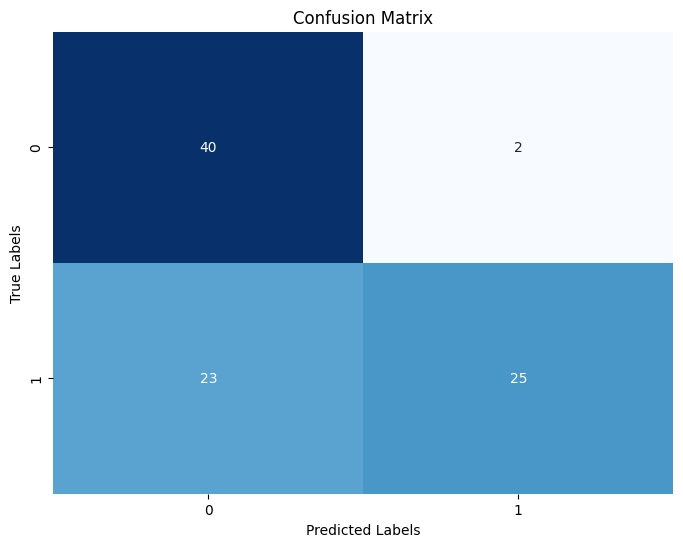

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


TEXT 6: In layman's terms, explain the significance of each cell of the Confusion Matrix.  HINT: Your explanation should detail the results within the context of 'true' and 'predicted' axes and labels.


Each cell in the confusion matrix is valuable. The confusion matrix depicts the predicted labels from the model vs the true labels from the model. You also get to see how many labels were predicted right for each category and how many predictions were wrong for each category. If we look at our confusion matrix at the bottom, we have our x axis that is labeled “predicted Labels” with our values 0 and 1. And on our y axis we have it labeled “true labels” with the values 0 to 1. Our value of 0 represents a negative review. And our value of 1 represents a positive review. To review the confusion matrix, we can see that we had 25 labels that were predicted correctly for our positive review, and 23 labels that were predicted incorrectly. And for our negative reviews we had 40 predicted correctly and 2 that were predicted correctly. The confusion matrix gives us a visual representation of how our models were doing and how they performed per each prediction category.

In [ ]:
# Generate and store the classification report for the fold
classification = classification_report(y_test, y_test_pred)
classification_reports.append(classification)

# Print the classification report for the current fold
print(f"Classification Report - Fold {len(classification_reports)}:\n{classification}")


Classification Report - Fold 12:
              precision    recall  f1-score   support

           0       0.63      0.95      0.76        42
           1       0.93      0.52      0.67        48

    accuracy                           0.72        90
   macro avg       0.78      0.74      0.71        90
weighted avg       0.79      0.72      0.71        90



<h2><b>HyperParameterTune the NaiveBayesClassifier</b></h2>

<h2>Using Stratified Kfold</h2>

AdaBoostClassifier Results with Stratified k-fold Cross-Validation:
Average Training Accuracy: 82.40%
Average Testing Accuracy: 76.40%
Average Accuracy Difference: 4.35%


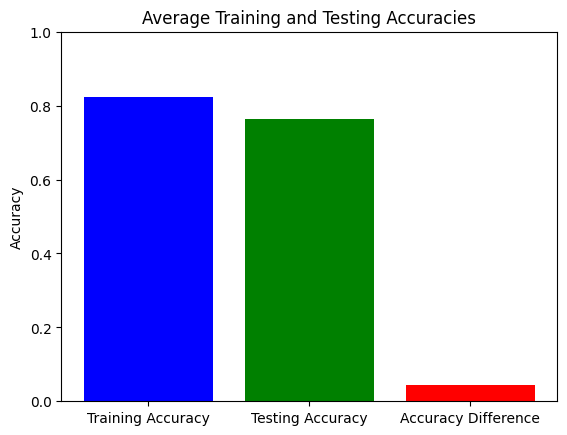

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Load your data (X and y) here

# Create an AdaBoostClassifier instance
ada_boost_classifier = AdaBoostClassifier()

# Specify the number of folds (k) and use StratifiedKFold
num_folds = 5
stratified_kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store metrics for each fold
train_accuracies = []
test_accuracies = []

# Loop through each fold
for train_index, test_index in stratified_kf.split(X, y):  # Notice the addition of 'y'
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the AdaBoostClassifier on the training data
    ada_boost_classifier.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred = ada_boost_classifier.predict(X_train)

    # Calculate training accuracy for the fold
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Make predictions on the testing data
    y_test_pred = ada_boost_classifier.predict(X_test)

    # Calculate testing accuracy for the fold
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Calculate the average training and testing accuracies
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
average_accuracy_difference = np.mean(train_accuracy - test_accuracies)
# Print the results
print("AdaBoostClassifier Results with Stratified k-fold Cross-Validation:")
print("="*149)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Accuracy Difference: {average_accuracy_difference * 100:.2f}%")
print("="*149)

import matplotlib.pyplot as plt

# Create a bar plot
categories = ['Training Accuracy', 'Testing Accuracy', 'Accuracy Difference']
values = [average_train_accuracy, average_test_accuracy, average_accuracy_difference]
plt.bar(categories, values, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Average Training and Testing Accuracies')
plt.ylim(0, 1.0)  # Set the y-axis limits between 0 and 1
plt.show()


# **Predictions**

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def predict_sentiment(sample_review, ada_boost_classifier, cv):
    # Preprocess the sample review
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    # Transform the preprocessed review using the CountVectorizer (cv)
    temp = cv.transform([final_review]).toarray()

    # Use the pre-trained classifier to predict sentiment
    sentiment = ada_boost_classifier.predict(temp)

    return sentiment[0]  # Return the predicted sentiment (assuming it's a single value)


In [ ]:
# Sample reviews as strings
reviews = [
    'The food is really bad.',
    'I love their delicious dishes!',
    'Terrible experience. Avoid this place.',
    'The service was excellent.',
    'Worst place ever, but nice food'
]

for review in reviews:
    sentiment = predict_sentiment(review, ada_boost_classifier, cv)
    if sentiment:
        sentiment_label = 'POSITIVE'
    else:
        sentiment_label = 'NEGATIVE'

    print(f"Review: '{review}'")
    print(f"Sentiment: {sentiment_label}")
    print()


Review: 'The food is really bad.'
Sentiment: NEGATIVE

Review: 'I love their delicious dishes!'
Sentiment: POSITIVE

Review: 'Terrible experience. Avoid this place.'
Sentiment: NEGATIVE

Review: 'The service was excellent.'
Sentiment: POSITIVE

Review: 'Worst place ever, but nice food'
Sentiment: NEGATIVE



# Overall Accuracy

AdaBoostClassifier Results with Stratified k-fold Cross-Validation:
Average Training Accuracy: 82.40%
Average Testing Accuracy: 76.40%
Average Accuracy Difference: 4.35%


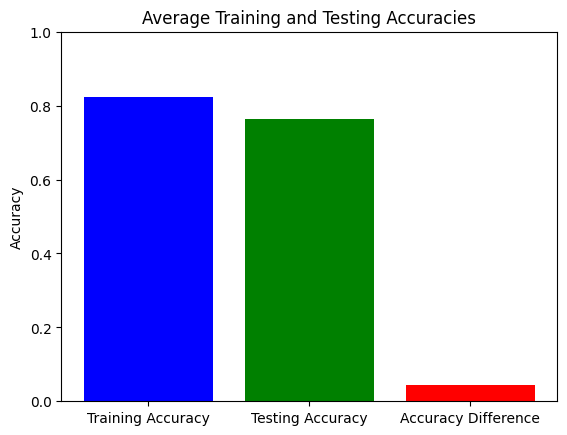

In [ ]:
print("AdaBoostClassifier Results with Stratified k-fold Cross-Validation:")
print("="*149)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Accuracy Difference: {average_accuracy_difference * 100:.2f}%")
print("="*149)



# Create a bar plot
categories = ['Training Accuracy', 'Testing Accuracy', 'Accuracy Difference']
values = [average_train_accuracy, average_test_accuracy, average_accuracy_difference]
plt.bar(categories, values, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Average Training and Testing Accuracies')
plt.ylim(0, 1.0)  # Set the y-axis limits between 0 and 1
plt.show()

#Sentiment Analysis with VADER (Valence Aware Dictionary and sEntiment Reasoner)

**VADER** is a pre-built sentiment analysis tool commonly used (NLP). It is designed to analyze text data and determine the sentiment polarity of the text, i.e., whether the text expresses positive, negative, or neutral sentiment.

**VADER** is particularly useful for sentiment analysis of social media text, short texts, and informal language, as it is specifically tuned for such contexts.

**Compound Score :** VADER provides a compound score that represents the overall sentiment of the text, taking into account both positive and negative language. The compound score can help in quantifying sentiment intensity.

For more information on VADER:

*   https://www.codeproject.com/Articles/5269445/Using-Pre-trained-VADER-Models-for-NLTK-Sentiment
*   https://www.codeproject.com/Articles/5269447/Pros-and-Cons-of-NLTK-Sentiment-Analysis-with-VADE





In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer


vader = SentimentIntensityAnalyzer()

def sent_analysis(corpus):
    '''
    input : The text
    output : The sentiment of the text
    '''
    sentiment = vader.polarity_scores(corpus)
    compound_score = sentiment['compound']

    if compound_score > 0 :
        return 1
    else:
        return 0


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df['vader_sent'] = df['Review'].apply(lambda x : sent_analysis(x))


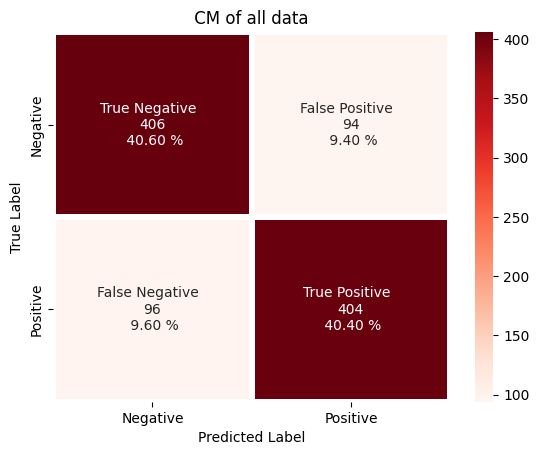

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm_names = ['True Negative' ,'False Positive','False Negative' ,'True Positive']
cm=confusion_matrix(df['Liked'],df['vader_sent'])
value_count = [ value  for value in cm.flatten()]
presentage = [value for value in  cm.flatten()/ np.sum(cm)  ]
all_labels = [f'{v1}  \n{v2}\n {v3*100:.2f} %' for v1 ,v2 ,v3 in zip(cm_names ,value_count,presentage )]
all_labels = np.asarray(all_labels).reshape(2,2)
sns.heatmap(cm,annot=all_labels,cmap='Reds',
                linewidth=3,fmt='',
                xticklabels=['Negative','Positive'],
                yticklabels=['Negative','Positive']
               )


plt.title(' CM of all data ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

TEXT 7: a) Offer any final comments on the Predictions, Overall Accuracy and CM of the final models. b) What was the purpose of introducing 'sample reviews as strings'?  Were the results as you expected?  c) Any observations regarding the VADER model?


I think the prediction of the confusion matrix of all data was interesting. It is crazy to see how accurate it was. If you look at the confusion matrix it got 404 values correct on the prediction of a true positive and 406 values correct in prediction of a true negative. In total out of the false positive and negative the model only got 190 incorrect. Which means the model only predicted wrong answers 23% of the time. This is good and means that there is still room for improvement in this model as well. The more data and times we train it, the model will get more accurate and be closer to that 99% accuracy that we always look for. I think the model exceeded my expectations in predictions. The purpose for using sample reviews as strings was to make the data easier for the NLP model to understand, especially sense we are doing sentiment analysis. The results were kind of in the range I expected, especially after we used the method of finding different classification models that better fit this use case and finding the difference in accuracy between them.